<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>16.- Feature Selection</font>

<font color='steelblue'>Feature Selection is the process where you automatically or manually select the most relevant features which contribute most to the correct output of the model.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Selection of Categorical-Input/Categorical-Output</b>	
- Encoding-Categorical-Features
- Chi-Squared-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Logistic-Regression-model
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Categorical-Output</b>	
- ANOVA-F-test-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluating-a-Logistic-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Numerical-Output</b>	
- Correlation-with-the-outcome-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Lineal-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Any-data</b>	
- RFE-(Recursive-Feature-Elimination)
- Tuning-the-Number-of-Selected-Features
- Automatically-Select-the-Number-of-Features
    
<font color='steelblue'><b>Explore the use of diferent algorithms wrapped by RFE</b>	
    
<font color='steelblue'><b>Explore the use od Hybrid feature selection algorithms</b>	

## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_25_09.2_01_lista_espera_completo_clean_v_01.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [26]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [27]:
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)


### Paths

In [28]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [29]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [30]:
iFile <- "CU_25_09.2_01_lista_espera_completo_clean_v_01.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_25_09.2_01_lista_espera_completo_clean_v_01.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [81]:
data <- read.csv(file_data)


Estructura de  los datos:

In [32]:
data |> glimpse()

Rows: 55,216
Columns: 46
$ Hospital          <chr> "HOSPITAL REY JUAN CARLOS", "HOSPITAL CENTRAL DE LA …
$ Especialidad      <chr> "UROLOGÍA", "ODONTOESTOMATOLOGÍA", "GINECOLOGÍA", "D…
$ total_pacientes   <dbl> 344, 0, 52, 37, 0, 4, 0, 718, 0, 271, 108, 0, 34, 86…
$ ano               <dbl> 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2020, 2021…
$ semana            <dbl> 30, 36, 49, 23, 3, 5, 50, 7, 35, 1, 42, 10, 21, 33, …
$ CODCNH            <dbl> 281348, 280724, 281292, 281292, 281236, 280724, 2807…
$ id_area           <dbl> 8, 7, 11, 11, 11, 7, 3, 6, 1, 2, 2, 8, 11, 11, 1, 3,…
$ nombre_area       <chr> "SUR-OESTE I", "CENTRO-OESTE", "SUR II", "SUR II", "…
$ cmunicipio        <dbl> 280920, 280796, 280133, 280133, 281610, 280796, 2800…
$ Municipio         <chr> "MÓSTOLES", "MADRID", "ARANJUEZ", "ARANJUEZ", "VALDE…
$ CAMAS             <dbl> 382, 475, 98, 98, 182, 475, 507, 613, 269, 1143, 156…
$ Clase             <chr> "HOSPITALES GENERALES", "HOSPITALES GENERALES", "HOS…
$ Dependencia  

Muestra de los primeros datos:

In [33]:
data |> slice_head(n = 5)

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
HOSPITAL REY JUAN CARLOS,UROLOGÍA,344,2021,30,281348,8,SUR-OESTE I,280920,MÓSTOLES,⋯,0.3348780,0.1369254,0.5072726,0.5849309,17,1447,573,12,54.45,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,ODONTOESTOMATOLOGÍA,0,2020,36,280724,7,CENTRO-OESTE,280796,MADRID,⋯,0.4914365,0.1217100,0.4915713,0.5597213,0,1211,45,0,0.00,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,GINECOLOGÍA,52,2021,49,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,8,1293,108,2,37.96,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,DERMATOLOGÍA,37,2021,23,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,5,1501,103,2,23.14,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,ODONTOESTOMATOLOGÍA,0,2021,3,281236,11,SUR II,281610,VALDEMORO,⋯,0.3346063,0.1517321,0.5024130,0.5900028,0,1240,44,0,0.00,TRUE


## Selecting Categorical Input / Categorical Output

### Encoding Categorical Features

In [34]:
# Convert all character columns to factors
data <- mutate_if(data, is.character, as.factor)
data <- na.omit(data)

train_set <- subset(data[data$is_train == TRUE, ], select = -is_train)
train_set <- select_if(train_set, is.numeric)
test_set <- subset(data[data$is_train == FALSE, ], select = -is_train)
test_set <- select_if(test_set, is.numeric)


### Chi-Squared Feature Selection

No aplica ya que el Target no es categórico.


### Mutual Information Feature Selection

No aplica ya que el Target no es categórico.


### Evaluating a Logistic Regression model

No aplica ya que el Target no es categórico.

<font color='darkgrey'><b>Operation</font>

## Selecting Numerical Input / Categorical Output

### ANOVA F-test Feature Selection

### Mutual Information Feature Selection

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting feature to use</font>

In [35]:
# Select numer of Features to use


<font color='darkgrey'><b>Operation</font>

## Selecting Numerical Input / Numerical Output

### Correlation with the outcome Feature Selection

In [77]:


# Calculate the correlation between each feature and the outcome variable
correlations <- sapply(select_if(train_set, is.numeric)[, -which(names(select_if(train_set, is.numeric)) %in% "Target")], function(x) cor(x, train_set$Target))

# Create a dataframe from the correlations
correlation_df <- data.frame(Feature = names(correlations), Correlation = correlations)

# Sort the dataframe by the absolute values of the correlations in descending order
correlation_df <- correlation_df[order(-abs(correlation_df$Correlation)), ]

# Print the correlation dataframe
print(correlation_df)


                            Feature  Correlation
consultas                 consultas  0.342597189
total_pacientes     total_pacientes  0.342584988
CAMAS                         CAMAS  0.313363306
HEM                             HEM  0.299355442
hospitalizaciones hospitalizaciones  0.296903803
TAC                             TAC  0.270636095
ALI                             ALI  0.243984162
ASD                             ASD  0.237658677
capacidad                 capacidad  0.234853780
SPECT                         SPECT  0.224919516
DIAL                           DIAL  0.224345426
RM                               RM  0.172976711
X                                 X  0.167823523
CODCNH                       CODCNH -0.167594808
DO                               DO  0.164167441
GAM                             GAM  0.162103092
MAMOS                         MAMOS  0.159968110
Y                                 Y  0.122519855
t5_1                           t5_1  0.111325391
t6_1                

### Mutual Information Feature Selection

Warning message in .information_gain.data.frame(formula, data, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


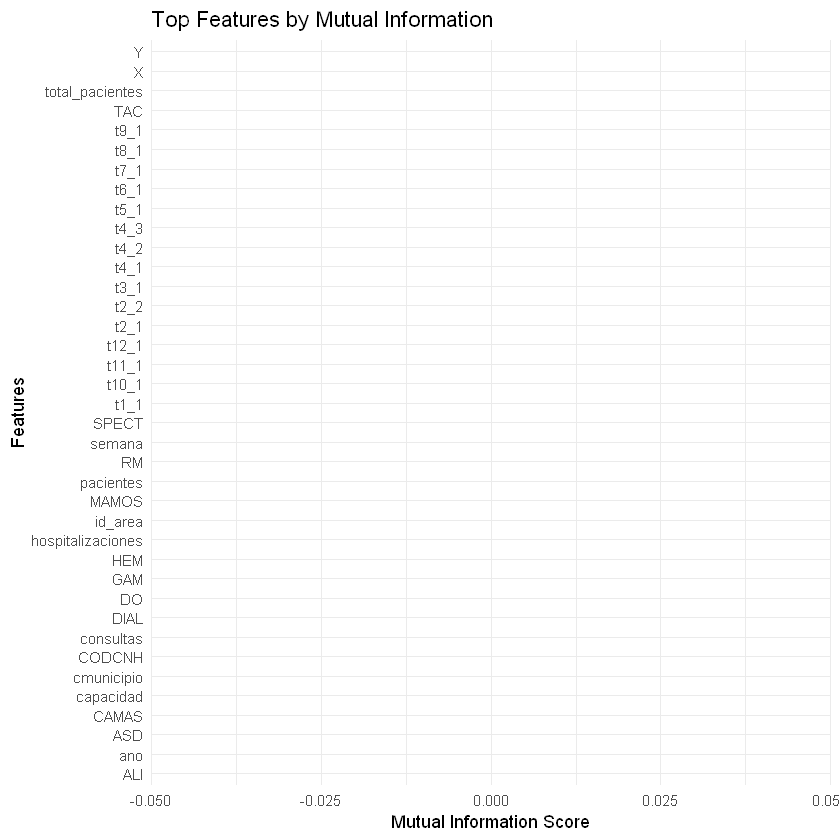

In [40]:

# install the necessary packages if not already installed
if (!require(FSelectorRcpp)) {
  install.packages('FSelectorRcpp')
}

# Load necessary library
library(FSelectorRcpp)
library(ggplot2)
train_data <- train_set

# Calculate mutual information between each variable and the target
mi_scores <- information_gain(train_data[, setdiff(names(train_data), "Target")], train_data$Target)

# Convert the top_features object into a dataframe
mi_scores_df <- as.data.frame(mi_scores)

# Rename the columns
names(mi_scores_df) <- c("Feature", "Score")

# Order the dataframe by Score in descending order
mi_scores_df <- mi_scores_df[order(-mi_scores_df$Score),]

# Create a bar plot
ggplot(mi_scores_df, aes(x = reorder(Feature, Score), y = Score)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  xlab("Features") +
  ylab("Mutual Information Score") +
  ggtitle("Top Features by Mutual Information") +
  theme_minimal()

### Evaluating a Lineal Regression model

In [50]:

# Select numer of Features to use
k <- 2

<font color='tomato'>Selecting feature to use</font>

In [51]:
# Select numer of Features to use
# Fit a linear regression model
library(tidyverse)
library(caret)

model_all_features <- lm(Target ~ ., data = train_set)

# Predict on the test set
predictions <- predict(model_all_features, newdata = test_set)

# Evaluate the model
postResample(pred = predictions, obs = test_set$Target)

RMSE   Rsquared        MAE 
35.9881884  0.2827033 27.6960873

<font color='darkgrey'><b>Operation</font>

In [78]:
# Select the top k features
     k <- 5

# Get the vector of the first k features
top_features <- correlation_df$Feature[1:k]
top_features
# Fit a linear regression model with only the top k features
model_top_features <- lm(Target ~ ., data = train_set[, c(top_features, "Target")])

# Predict on the test set
predictions_top_features <- predict(model_top_features, newdata = test_set[, top_features])

# Evaluate the model
postResample(pred = predictions_top_features, obs = test_set$Target)

[1] "consultas"         "total_pacientes"   "CAMAS"            
[4] "HEM"               "hospitalizaciones"

RMSE  Rsquared       MAE 
37.988452  0.200807 30.244426

### Tuning the Number of Selected Features

#### Know the best number of features to select

#### See the relationship between the number of selected features and MAE

## Any data: RFE (Recursive Feature Elimination)

### RFE for Regression

<font color='tomato'>Selecting feature to use</font>

In [ ]:
# Select numer of Features to use
k <- 5

<font color='darkgrey'><b>Operation</font>

In [79]:
# Define control parameters for rfe function
ctrl <- rfeControl(functions=lmFuncs, method="cv", number=10)

# Determine number of predictors
predictors_number <- ncol(train_set) - 1 # Assuming the last column is the target variable

# Apply the RFE algorithm with cross validation.
result <- rfe(train_set[, !names(train_set) %in% "Target"], train_set$Target, sizes=c(1:predictors_number), rfeControl=ctrl)

# Print the result
print(result)

# Top ranking variables in the optimal subset size
top_features <- predictors(result, result$optsize)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD  MAESD Selected
         1 41.99 0.003049 34.18 0.5618   0.002440 0.2945         
         2 41.88 0.008042 34.09 0.5529   0.003176 0.2685         
         3 41.76 0.013921 33.99 0.5501   0.005456 0.2896         
         4 41.67 0.017936 33.98 0.5043   0.003247 0.2481         
         5 41.61 0.020733 34.00 0.4806   0.003814 0.2104         
         6 41.50 0.025895 33.87 0.4907   0.005185 0.2280         
         7 41.34 0.033713 33.65 0.4796   0.005620 0.1934         
         8 41.12 0.043599 33.41 0.5071   0.010784 0.2590         
         9 40.66 0.065085 33.06 0.4140   0.010609 0.1964         
        10 40.17 0.086948 32.41 0.9213   0.040546 1.0934         
        11 39.91 0.098612 32.23 1.0181   0.045953 1.1659         
        12 38.29 0.170397 30.25 0.5215   0.036227 0.8328         
        13 37.80 

## <font color='green'>Data Save</font>


* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 16

In [ ]:
# caso <- "CU_XX"
# proceso <- '_09.2'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [ ]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia
- O bien se hacen en el dominio IV o V para integrar en el pipeline de modelización

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están listos para la modelización y despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>